### 模型融合
一般来说，通过融合多个不同的模型，可能提升机器学习的性能，这一方法在各种机器学习比赛中广泛应用， 常见的集成学习&模型融合方法包括：简单的Voting/Averaging（分别对于分类和回归问题）、Stacking、Boosting和Bagging。

**Voting**
* 从最简单的Voting说起，这也可以说是一种模型融合。假设对于一个二分类问题，有3个基础模型，那么就采取投票制的方法，投票多者确定为最终的分类。

**Averaging**
* 对于回归问题，一个简单直接的思路是取平均。稍稍改进的方法是进行加权平均。权值可以用排序的方法确定，举个例子，比如A、B、C三种基本模型，模型效果进行排名，假设排名分别是1，2，3，那么给这三个模型赋予的权值分别是3/6、2/6、1/6这两种方法看似简单，其实后面的高级算法也可以说是基于此而产生的，Bagging或者Boosting都是一种把许多弱分类器这样融合成强分类器的思想。
* 注意两个问题：
* 如果进行投票的模型越多，那么显然其结果将会更好。但是**其前提条件是模型之间相互独立，结果之间没有相关性。越相近的模型进行融合，融合效果也会越差。 模型之间差异越大，融合所得的结果将会更好。这种特性不会受融合方式的影响。注意这里所指模型之间的差异，并不是指正确率的差异，而是指模型之间相关性的差异。** 对于回归问题，对各种模型的预测结果进行平均，所得到的结果通过能够减少过拟合，并使得边界更加平滑，单个模型的边界可能很粗糙。
* 在上述融合方法的基础上，一个进行改良的方式是对各个投票者/平均者分配不同的权重以改变其对最终结果影响的大小。对于正确率低的模型给予更低的权重，而正确率更高的模型给予更高的权重。

**Bagging**
* Bagging就是采用有放回的方式进行抽样，用抽样的样本建立子模型,对子模型进行训练，这个过程重复多次，最后进行融合。大概分为这样两步：
                1.重复K次
                 有放回地重复抽样建模
                 训练子模型
                2.模型融合
                 分类问题：voting
                 回归问题：average
                 
* Bagging算法不用我们自己实现，随机森林就是基于Bagging算法的一个典型例子，采用的基分类器是决策树。

**Boosting**
* Bagging算法可以并行处理，而Boosting的思想是一种迭代的方法，每一次训练的时候都更加关心分类错误的样例，给这些分类错误的样例增加更大的权重，下一次迭代的目标就是能够更容易辨别出上一轮分类错误的样例。最终将这些弱分类器进行加权相加。
*  其基本工作机制如下：
    1. 从初始样本集中训练出一个基学习器
    2. 根据基学习器的表现对样本集分布进行调整，使得做错的样本能在之后的过程中受到更多的关注； 
    3.用调整后的样本集训练下一个基学习器； 
    4.重复上述步骤，直到满足一定条件。
    
* 注意，一般只有弱分类器都是同一种分类器（即同质集成）的时候，才将弱分类器称为基学习器，如果是异质集成，则称之为个体学习器。

**Stacking**
* 1.首先我们将训练集分为五份。
* 2.对于每一个基模型来说，我们用其中的四份来训练，然后对未用来的训练的一份训练集和测试集进行预测。然后改变所选的用来训练的训练集和用来验证的训练集，重复此步骤，直到获得完整的训练集的预测结果。
* 3.对五个模型，分别进行步骤2，我们将获得5个模型，以及五个模型分别通过交叉验证获得的训练集预测结果。即P1、P2、P3、P4、P5。
* 4.用五个模型分别对测试集进行预测，得到测试集的预测结果：T1、T2、T3、T4、T5。
* 5.将P1~5、T1~5作为下一层的训练集和测试集。
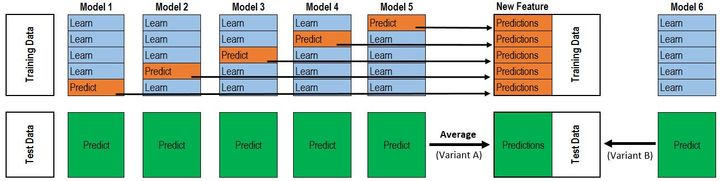

- GBDT

In [1]:
import sklearn
import matplotlib as mlp
import numpy as np
import pandas as pd
import re

In [11]:
for package in [sklearn,mlp,np,pd]:
    print(re.findall("([^']*)",str(package))[2],package.__version__)

sklearn 0.24.2
matplotlib 3.4.3
numpy 1.20.3
pandas 1.3.3


In [18]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
from time import time

In [15]:
# 最重要参数n_estiamtors,learning_rate
data = pd.read_csv(r'E:/数据分析数据集/公开课sample_data1.csv',index_col=0)
data.shape

(45988, 107)

In [16]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [19]:
for i in range(50,550,50):
    start = time()
    model = GBR(n_estimators=i,random_state=1412)
    model.fit(X,y)
    print('estimators:{},\tR2:{:.3f}%,\tTime:{:.3f}'.format(i,model.score(X,y)*100,time()-start))

estimators:50,	R2:75.448%,	Time:33.054
estimators:100,	R2:80.529%,	Time:65.452
estimators:150,	R2:83.924%,	Time:98.366
estimators:200,	R2:86.109%,	Time:130.805
estimators:250,	R2:87.777%,	Time:163.624
estimators:300,	R2:88.954%,	Time:197.068
estimators:350,	R2:89.854%,	Time:230.319
estimators:400,	R2:90.730%,	Time:262.920
estimators:450,	R2:91.366%,	Time:294.698
estimators:500,	R2:91.999%,	Time:326.379


In [22]:
for i in np.linspace(0.01,0.2,10):
    start = time()
    model = GBR(n_estimators=50,learning_rate=i,random_state=1412)
    model.fit(X,y)
    print('learningrate:{:.3f},\tR2:{:.3f}%,\tTime:{:.3f}'.format(i,model.score(X,y)*100,time()-start))

learningrate:0.010,	R2:38.415%,	Time:33.041
learningrate:0.031,	R2:63.408%,	Time:32.740
learningrate:0.052,	R2:70.332%,	Time:32.749
learningrate:0.073,	R2:73.735%,	Time:32.706
learningrate:0.094,	R2:75.090%,	Time:32.750
learningrate:0.116,	R2:76.688%,	Time:32.781
learningrate:0.137,	R2:77.494%,	Time:32.867
learningrate:0.158,	R2:78.929%,	Time:32.944
learningrate:0.179,	R2:80.684%,	Time:32.794
learningrate:0.200,	R2:81.176%,	Time:32.904


In [23]:
# 其次max_depth,max_features(random_state)
# 需要理解内涵loss,alpha来判断

In [24]:
# criterion(弗里得曼均方误差)

In [2]:
data = pd.read_csv(r'E:/数据分析数据集/公开课sample_data2.csv',index_col=0)
data.head()

,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,商品销售数量,订单渠道,支付方式,下单用户ID,城市,异常,订单金额
0,14.0,5.0,1.0,15907.0,227.0,41.0,1.0,0.0,24870.0,5.0,1,3009.0
1,14.0,11.0,1.0,15431.0,1551.0,40.0,1.0,0.0,50713.0,207.0,1,2970.0
2,10.0,2.0,1.0,18402.0,2049.0,40.0,1.0,0.0,46259.0,133.0,1,621.0
3,23.0,5.0,1.0,19080.0,377.0,40.0,1.0,0.0,62154.0,101.0,0,1499.0
4,16.0,3.0,1.0,18580.0,748.0,40.0,1.0,0.0,56469.0,223.0,0,2799.0


In [3]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [11]:
from sklearn.model_selection import cross_val_score as CSV
from sklearn.model_selection import KFold

In [28]:
gbr = GBR(n_estimators=10,random_state=1412)
cv = KFold(n_splits=5  # 80%的数据做训练集，20%的数据做验证集
           ,shuffle=True # 每次交叉验证时，对我们的数据进行随机打乱
           ,random_state=1412)

In [29]:
result_gbr = CSV(gbr,X,y,cv=cv,scoring='neg_mean_squared_error')

In [31]:
result_gbr

array([-339401.88950721, -338588.91587316, -335226.72388937,
       -338266.61125181, -336801.04024453])

In [30]:
(abs(result_gbr)**0.5).mean() #rmse

581.0812479153219

In [32]:
(abs(result_gbr)**0.5).var()

1.6194743869281418

- LGBM

In [33]:
import lightgbm as lgb

In [34]:
traindata = lgb.Dataset(X,y)

In [35]:
param = {'seed':1412}
reg = lgb.train(param,traindata)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 131282, number of used features: 11
[LightGBM] [Info] Start training from score 784.113062


In [36]:
param = {'seed':1412,'force_col_wise':True} # 列方向
reg = lgb.train(param,traindata)

[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 131282, number of used features: 11
[LightGBM] [Info] Start training from score 784.113062


In [37]:
y_pred = reg.predict(X) # X只能接受原始数据

In [39]:
# 对回归类算法，xgboost的默认评估指标是rmse
from sklearn.metrics import mean_squared_error as MSE
MSE(y,y_pred
    ,squared=False
   ) #rmse

185.62053413968766

In [40]:
# 使用交叉验证
param = {'seed':1412,'metric':'rmse','force_col_wise':True}
result  = lgb.cv(param,traindata,nfold=5,seed=1412,stratified=False,num_boost_round=10)

[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 105024, number of used features: 11
[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 105024, number of used features: 11
[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 105024, number of used features: 11
[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 105024, number of used features: 11
[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 105024, number of used features: 11
[LightGBM] [Info] Start training from score 782.951640
[LightGBM] [Info] Start training from score 784.545123
[LightGBM] [Info] Start training from score 783.902346
[LightGBM] [Info] Start training from score 784.656650
[LightGBM] [Info] Start training from score 784.544523


In [41]:
result

{'rmse-mean': [656.7002983721301,
  618.1214417392632,
  585.5066804103305,
  556.7414956670694,
  531.7723985179124,
  509.95819119861636,
  490.5970023571971,
  473.541250928488,
  458.0448343899361,
  445.19642243646865],
 'rmse-stdv': [1.359150872904874,
  1.042313314071729,
  0.6404904145969236,
  0.6992338424109549,
  1.1922714373450258,
  0.9834655846055245,
  1.3610985734732164,
  1.3133066014888497,
  1.8650607672665207,
  1.3486957828697674]}

In [43]:
result = pd.DataFrame(result)
result  # RMSE-根均方误差,STDV-标准差 # 建立10个树的过程中，每次迭代完毕之后的5次交叉验证的平均RMSE和stdv

,rmse-mean,rmse-stdv
0,656.700298,1.359151
1,618.121442,1.042313
2,585.506680,0.640490
3,556.741496,0.699234
4,531.772399,1.192271
5,509.958191,0.983466
6,490.597002,1.361099
7,473.541251,1.313307
8,458.044834,1.865061
9,445.196422,1.348696


- XGBoost

In [4]:
import xgboost as xgb

In [5]:
data = xgb.DMatrix(X,y)
params = {'seed':1412}  # xgboost里所有参数都有默认值
reg = xgb.train(params,data)

In [6]:
y_pred = reg.predict(data)

In [7]:
# 对回归类算法，xgboost的默认评估指标是rmse
from sklearn.metrics import mean_squared_error as MSE
MSE(y,y_pred,squared=False)

361.8051599869066

In [8]:
# 在xgboost中使用交叉验证
result = xgb.cv(params,data,nfold=5,seed=1412)

In [9]:
result.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
5,418.995459,1.579261,420.278430,1.576042
6,396.460327,2.071434,397.958081,3.030705
7,380.940582,2.586329,382.422473,3.362749
8,368.946649,2.629567,370.637708,4.949196
9,357.609833,3.130980,359.885339,4.549996


In [10]:
# sklearn中的API
from xgboost import XGBRegressor

In [18]:
xgb2 = XGBRegressor(n_estimators=10,random_state=1412)
cv = KFold(n_splits=5,shuffle=True,random_state=1412)

In [19]:
result_xgb2 = CSV(xgb2,X,y,cv=cv,scoring='neg_mean_squared_error')

In [20]:
(abs(result_xgb2)**0.5).mean() #rmse

359.8855803855457

In [21]:
(abs(result_xgb2)**0.5).var()

20.704800080225752

In [17]:
cv_train = []
cv_test = []
for eta in np.linspace(0.1,0.5,10):
    params = {'objective':'reg:squarederror'
             ,'eta':eta
             ,'seed':1412}
    result = xgb.cv(params,data,num_boost_round=100,nfold=5,seed=1412)
    cv_test.append(result.iloc[-1,-2])
    cv_train.append(result.iloc[-1,0])
    print('completed {}'.format(eta))

completed 0.1
completed 0.14444444444444446
completed 0.18888888888888888
completed 0.23333333333333334
completed 0.2777777777777778
completed 0.32222222222222224
completed 0.3666666666666667
completed 0.4111111111111111
completed 0.4555555555555556
completed 0.5


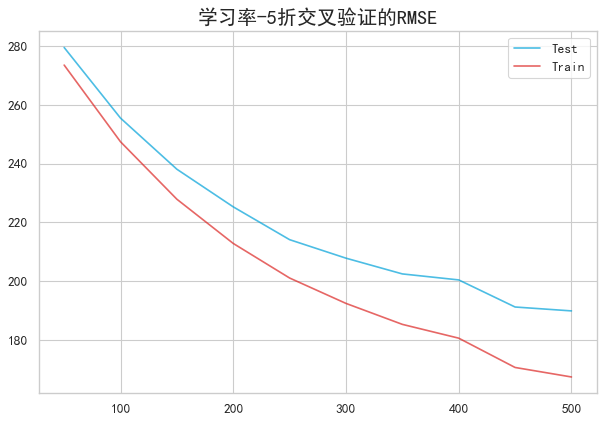

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(9,6),dpi=80)
plt.plot(range(50,550,50),cv_test,color='#01a2d9',alpha=0.7,label='Test')
plt.plot(range(50,550,50),cv_train,color='#dc2624',alpha=0.7,label='Train')
plt.legend()
sns.set(style='whitegrid',font='simhei',font_scale=1.1)
plt.title('学习率-5折交叉验证的RMSE',fontsize=18)
plt.show()

* verbosity: 0:不打印任何内容 1:如果有警告，打印警告 2:打印建树的全部信息 3:我正在debug，打印更多信息
* missing:自动处理缺失值(树模型都有，不关心特征具体值)
* num_parallel_tree:使用xgboost建随机森林的时候才有效

* 常用融合方式：平均法（回归）、投票法（分类）、堆叠法（著名stacking:逻辑回归（个体学习器）+GBDT（元学习器））、混合法

In [26]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.model_selection import cross_val_score as CSV
from sklearn.model_selection import KFold
from xgboost import XGBRFRegressor
from lightgbm import LGBMRegressor
from time import time

In [27]:
cv = KFold(n_splits=5,shuffle=True,random_state=1412)

In [28]:
# GBR
gbr = GBR(n_estimators=100,random_state=1412)
start = time()
result_gbr = CSV(gbr,X,y,cv=cv,scoring='neg_mean_squared_error')
print(time()-start)

88.68311595916748


In [29]:
(abs(result_gbr)**0.5).mean()

396.96524429050487

In [30]:
(abs(result_gbr)**0.5).var()

11.218087827112537

In [32]:
# LGBM
lgbm = LGBMRegressor(n_estimators=100,random_state=1412,force_col_wise=True,metric='rmse')
start = time()
result_lgb = CSV(lgbm,X,y,cv=cv,scoring='neg_mean_squared_error')
print(time()-start)

4.845745325088501


In [33]:
(abs(result_lgb)**0.5).mean()

278.1041099194505

In [34]:
(abs(result_lgb)**0.5).var()

9.546768918499128

In [35]:
# XGBoost
xgb_reg = XGBRegressor(n_estimators=100,random_state=1412)
start = time()
result_xgb = CSV(xgb_reg,X,y,cv=cv,scoring='neg_mean_squared_error')
print(time()-start)

53.242615938186646


In [36]:
(abs(result_xgb)**0.5).mean()

210.87126054622726

In [37]:
(abs(result_xgb)**0.5).var()

9.870540394847437

- 使用最简单的平均法进行融合

In [38]:
from sklearn.ensemble import VotingRegressor

# 需要以元组的列表方式来构建estimators
gbr = GBR(n_estimators=100,random_state=1412)
lgbm = LGBMRegressor(n_estimators=100,random_state=1412,force_col_wise=True,metric='rmse')
xgb_reg = XGBRegressor(n_estimators=100,random_state=1412)

In [39]:
estimators = [('GBR',gbr),('LGBM',lgbm),('XGB',xgb_reg)]

In [40]:
mix = VotingRegressor(estimators,verbose=True)
cvresult = CSV(mix,X,y,cv=cv,scoring='neg_mean_squared_error')

[Voting] ...................... (1 of 3) Processing GBR, total=  17.8s
[Voting] ..................... (2 of 3) Processing LGBM, total=   0.8s
[Voting] ...................... (3 of 3) Processing XGB, total=  10.4s
[Voting] ...................... (1 of 3) Processing GBR, total=  17.7s
[Voting] ..................... (2 of 3) Processing LGBM, total=   0.8s
[Voting] ...................... (3 of 3) Processing XGB, total=  10.3s
[Voting] ...................... (1 of 3) Processing GBR, total=  17.9s
[Voting] ..................... (2 of 3) Processing LGBM, total=   0.8s
[Voting] ...................... (3 of 3) Processing XGB, total=  10.5s
[Voting] ...................... (1 of 3) Processing GBR, total=  17.8s
[Voting] ..................... (2 of 3) Processing LGBM, total=   0.8s
[Voting] ...................... (3 of 3) Processing XGB, total=  10.5s
[Voting] ...................... (1 of 3) Processing GBR, total=  17.7s
[Voting] ..................... (2 of 3) Processing LGBM, total=   0.8s
[Votin

In [42]:
(abs(cvresult)**0.5).mean()

276.5967460613563

In [43]:
(abs(cvresult)**0.5).var()

9.56818862007965

- 平均融合的效果好于单一评估器效果的前提：
>- 评估器是精调之后的强学习器
>- 被融合的评估器在交叉验证的分数差异不大
>- 评估器与评估器之间是相互独立的（使用随机性参数）

In [44]:
gbr = GBR(n_estimators=300,learning_rate=0.5,max_features=0.6,random_state=1412)

In [45]:
start = time()
result_gbr = CSV(gbr,X,y,cv=cv,scoring='neg_mean_squared_error')
print(time()-start)

160.6862814426422


In [46]:
(abs(result_gbr)**0.5).mean()

243.57883448638546

In [47]:
(abs(result_gbr)**0.5).var()

12.566177233188109

In [48]:
# LGBM
lgbm = LGBMRegressor(n_estimators=200,learning_rate = 0.5,colsample_bytree=0.6,random_state=1412,force_col_wise=True,metric='rmse')
start = time()
result_lgb = CSV(lgbm,X,y,cv=cv,scoring='neg_mean_squared_error')
print(time()-start)

8.31576156616211


In [49]:
(abs(result_lgb)**0.5).mean()

209.79153535802192

In [50]:
(abs(result_lgb)**0.5).var()

12.571422101880497

In [51]:
# XGBoost
xgb_reg = XGBRegressor(n_estimators=100,learning_rate = 0.5,colsample_bytree=0.6,random_state=1412)
start = time()
result_xgb = CSV(xgb_reg,X,y,cv=cv,scoring='neg_mean_squared_error')
print(time()-start)

37.58149600028992


In [52]:
(abs(result_xgb)**0.5).mean()

200.84104520043624

In [53]:
(abs(result_xgb)**0.5).var()

6.58760884445049

In [54]:
estimators = [('GBR',gbr),('LGBM',lgbm),('XGB',xgb_reg)]
mix = VotingRegressor(estimators,verbose=True)
cvresult = CSV(mix,X,y,cv=cv,scoring='neg_mean_squared_error')

[Voting] ...................... (1 of 3) Processing GBR, total=  30.6s
[Voting] ..................... (2 of 3) Processing LGBM, total=   1.2s
[Voting] ...................... (3 of 3) Processing XGB, total=   7.4s
[Voting] ...................... (1 of 3) Processing GBR, total=  31.1s
[Voting] ..................... (2 of 3) Processing LGBM, total=   1.2s
[Voting] ...................... (3 of 3) Processing XGB, total=   7.3s
[Voting] ...................... (1 of 3) Processing GBR, total=  31.8s
[Voting] ..................... (2 of 3) Processing LGBM, total=   1.2s
[Voting] ...................... (3 of 3) Processing XGB, total=   7.1s
[Voting] ...................... (1 of 3) Processing GBR, total=  31.9s
[Voting] ..................... (2 of 3) Processing LGBM, total=   1.5s
[Voting] ...................... (3 of 3) Processing XGB, total=   7.3s
[Voting] ...................... (1 of 3) Processing GBR, total=  31.0s
[Voting] ..................... (2 of 3) Processing LGBM, total=   1.2s
[Votin

In [55]:
(abs(cvresult)**0.5).mean()

200.93284635947438

In [56]:
(abs(cvresult)**0.5).var()

4.660882490269849

In [57]:
estimators = [('LGBM',lgbm),('XGB',xgb_reg)]
mix = VotingRegressor(estimators,verbose=True)
cvresult = CSV(mix,X,y,cv=cv,scoring='neg_mean_squared_error')

[Voting] ..................... (1 of 2) Processing LGBM, total=   1.2s
[Voting] ...................... (2 of 2) Processing XGB, total=   7.2s
[Voting] ..................... (1 of 2) Processing LGBM, total=   1.2s
[Voting] ...................... (2 of 2) Processing XGB, total=   7.4s
[Voting] ..................... (1 of 2) Processing LGBM, total=   1.1s
[Voting] ...................... (2 of 2) Processing XGB, total=   7.1s
[Voting] ..................... (1 of 2) Processing LGBM, total=   1.2s
[Voting] ...................... (2 of 2) Processing XGB, total=   7.2s
[Voting] ..................... (1 of 2) Processing LGBM, total=   1.3s
[Voting] ...................... (2 of 2) Processing XGB, total=   7.1s


In [58]:
(abs(cvresult)**0.5).mean()

192.4772815119236

In [59]:
(abs(cvresult)**0.5).var()

5.257916642365961